In [31]:
import polars as pl
import numpy as np

import seaborn as sns

In [11]:
df_train = pl.read_parquet("../../data/train_preproc.parquet").sort("id")

In [12]:
df_train["id", "target"]

id,target
i64,i64
0,0
1,0
2,1
3,0
4,0
…,…
413189,0
413190,0
413191,0


In [33]:
step = (df_train["id"].max() - df_train["id"].min()) / 20

In [44]:
df_train = df_train.with_columns(dt = np.concatenate([np.full(int(step + 1), fill_value=i) for i in range(20)])[:df_train.shape[0]])

<Axes: xlabel='dt', ylabel='target'>

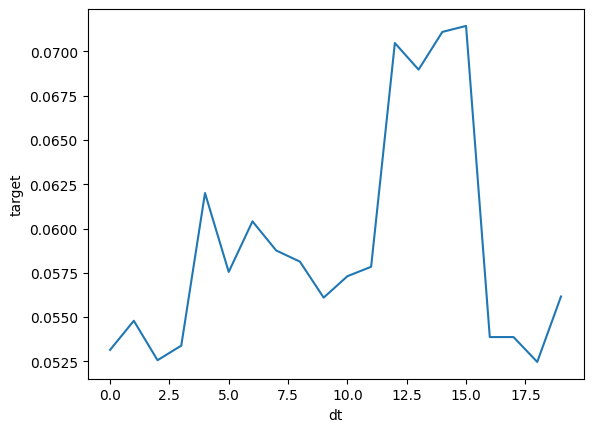

In [48]:
sns.lineplot(df_train.group_by("dt").agg(pl.mean("target")).sort("dt"), x="dt", y="target")